  <tr>
        <td width="15%">
        </td>
        <td>
            <div align="Middle">
                <font size=25px>
                    <b>  MNIST Multiclass Classifier using ANN with one hidden layer
                    </b>
                </font>
            </div>
        </td>
    </tr>

## Dataset
Downloaded directly from the curated repository 

## Data Definition:
60000 images denoting the nummbers 0 to 9

# Content

**[1. Import Python modules](#1)**<br>
**[2. Loading MNIST dataset and transforming](#2)**<br>
**[3. Activation functions, Neuron Layer, Weigths and bias](#3)**<br>
**[4. Initialize model, forward/ Back propagation, evaluation def function](#4)**<br>
**[5. Building the Model](#5)**<br>
**[6. The final parameter values](#6)**<br>
**[7. Plot the initial and final weight distribution comparison](#7)**<br>
**[8. Plot the accuracy vs. epoch  and F1 score](#8)**<br>
**[9. Make predictions on the test set](#9)**<br>

<a id='1'></a>
## Importing Libraries

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

<a id='2'></a>
## Loading MNIST dataset and transforming

In [3]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784')
X1 = mnist.data.astype('float32') / 255.0
X = X1.values
y1= mnist.target.astype('int')
y = y1.values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert y_train and y_test to NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

<a id='3'></a>
## Activation functions, Neuron Layer, Weigths and bias

In [4]:
# Define the activation functions
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

In [5]:
# Define the number of neurons in each layer
input_dim = X_train.shape[1]
hidden_dim = 256
output_dim = y_train_encoded.shape[1]

In [6]:
# Initialize the weights and biases
W1 = np.random.randn(input_dim, hidden_dim) * 0.01
b1 = np.zeros(hidden_dim)
W2 = np.random.randn(hidden_dim, output_dim) * 0.01
b2 = np.zeros(output_dim)

# Set hyperparameters
learning_rate = 0.01
num_epochs = 10
batch_size = 64
num_batches = X_train.shape[0] // batch_size

# Training loop
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

<a id='4'></a>
## Initialize model, forward/ Back propagation, evaluation def function

In [7]:
for epoch in range(num_epochs):
    # Shuffle the training data
    indices = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train_encoded[indices]

    epoch_loss = 0

    # Mini-batch training
    for batch in range(num_batches):
        start = batch * batch_size
        end = start + batch_size

        # Forward propagation
        h = relu(np.dot(X_train_shuffled[start:end], W1) + b1)
        y_pred = softmax(np.dot(h, W2) + b2)

        # Compute the categorical cross-entropy loss
        loss = -np.mean(y_train_shuffled[start:end] * np.log(y_pred + 1e-8))
        epoch_loss += loss

        # Backpropagation
        grad_y_pred = (y_pred - y_train_shuffled[start:end]) / batch_size
        grad_W2 = np.dot(h.T, grad_y_pred)
        grad_b2 = np.sum(grad_y_pred, axis=0)
        grad_h = np.dot(grad_y_pred, W2.T)
        grad_relu = grad_h * (h > 0)
        grad_W1 = np.dot(X_train_shuffled[start:end].T, grad_relu)
        grad_b1 = np.sum(grad_relu, axis=0)

        # Update parameters
        W1 -= learning_rate * grad_W1
        b1 -= learning_rate * grad_b1
        W2 -= learning_rate * grad_W2
        b2 -= learning_rate * grad_b2

    # Compute the average loss for the epoch
    epoch_loss /= num_batches
    train_losses.append(epoch_loss)

    # Evaluate on the test set
    h = relu(np.dot(X_test, W1) + b1)
    y_pred = softmax(np.dot(h, W2) + b2)
    test_loss = -np.mean(y_test_encoded * np.log(y_pred + 1e-8))
    test_losses.append(test_loss)

    # Compute accuracies
    y_train_pred = np.argmax(np.dot(relu(np.dot(X_train, W1) + b1), W2) + b2, axis=1)
    y_test_pred = np.argmax(y_pred, axis=1)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Print the loss and accuracy for the epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Test Loss: {test_loss:.4f}, "
          f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch 1/10, Train Loss: 0.1784, Test Loss: 0.0953, Train Accuracy: 0.7910, Test Accuracy: 0.7956
Epoch 2/10, Train Loss: 0.0671, Test Loss: 0.0517, Train Accuracy: 0.8667, Test Accuracy: 0.8646
Epoch 3/10, Train Loss: 0.0458, Test Loss: 0.0415, Train Accuracy: 0.8869, Test Accuracy: 0.8871
Epoch 4/10, Train Loss: 0.0390, Test Loss: 0.0371, Train Accuracy: 0.8971, Test Accuracy: 0.8959
Epoch 5/10, Train Loss: 0.0355, Test Loss: 0.0347, Train Accuracy: 0.9026, Test Accuracy: 0.9024
Epoch 6/10, Train Loss: 0.0333, Test Loss: 0.0327, Train Accuracy: 0.9088, Test Accuracy: 0.9081
Epoch 7/10, Train Loss: 0.0316, Test Loss: 0.0314, Train Accuracy: 0.9123, Test Accuracy: 0.9141
Epoch 8/10, Train Loss: 0.0302, Test Loss: 0.0301, Train Accuracy: 0.9155, Test Accuracy: 0.9159
Epoch 9/10, Train Loss: 0.0290, Test Loss: 0.0291, Train Accuracy: 0.9194, Test Accuracy: 0.9188
Epoch 10/10, Train Loss: 0.0279, Test Loss: 0.0282, Train Accuracy: 0.9223, Test Accuracy: 0.9224


<a id='5'></a>
## Plot the loss function vs. epochs

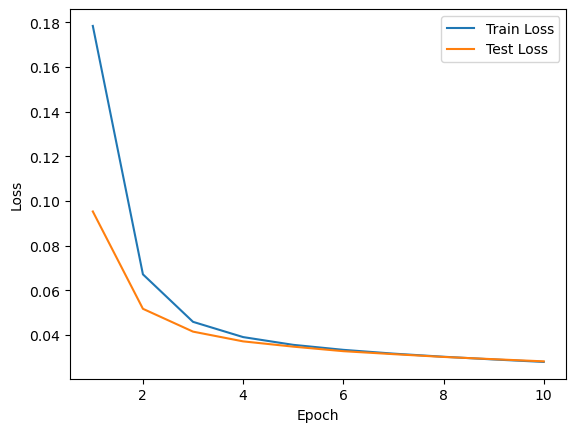

In [8]:
# Plot the loss function vs. epochs
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

<a id='6'></a>
## The final parameter values

In [9]:
# Print the final parameter values
print("\nFinal Parameter Values:")
print("W1:", W1)
print("b1:", b1)
print("W2:", W2)
print("b2:", b2)


Final Parameter Values:
W1: [[-0.00865846  0.00400013 -0.00134541 ... -0.02352214 -0.01856845
   0.01989977]
 [ 0.01434033  0.00898459 -0.00238531 ...  0.00706082 -0.00958527
  -0.00686705]
 [ 0.01426236 -0.00405115 -0.00262177 ...  0.00614622 -0.00564162
   0.01282137]
 ...
 [ 0.00655019  0.00203663 -0.00476341 ... -0.00668846 -0.01423833
  -0.00661016]
 [-0.01428636  0.01430273  0.00571126 ...  0.0052901   0.00768371
   0.0177603 ]
 [ 0.0033036   0.00645874 -0.00294604 ... -0.00375639  0.00080716
  -0.02122929]]
b1: [-5.67538877e-02  2.53088253e-02 -3.75935681e-02  2.91578251e-02
  1.63612633e-02  1.33559631e-02  8.21456459e-03  3.93228072e-02
 -1.98407485e-02  8.19658060e-04  1.17760346e-02  4.35945569e-02
 -1.55576399e-02  1.13712101e-02  2.73760952e-02 -4.98087915e-02
 -1.40182578e-02 -2.65488889e-03 -1.04621958e-03 -5.22911651e-03
 -5.77953304e-03  4.20966679e-02  6.94520620e-03  6.92032880e-02
  1.00272603e-02 -1.01708616e-02  4.24584388e-02  1.03889005e-02
  9.25571813e-03  6.

<a id='7'></a>
## Plot the initial and final weight distribution comparison

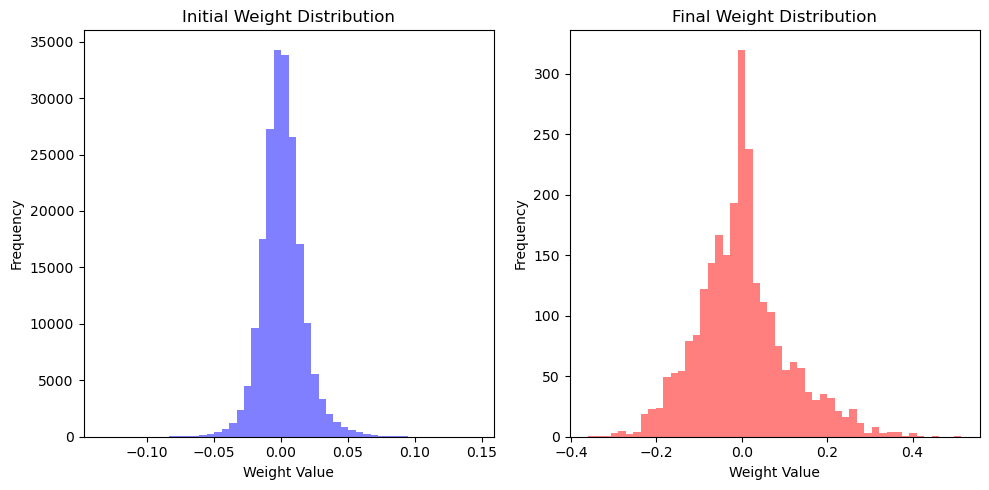

In [10]:
# Plot the initial and final weight comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(W1.flatten(), bins=50, alpha=0.5, color='blue')
plt.title("Initial Weight Distribution")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
plt.hist(W2.flatten(), bins=50, alpha=0.5, color='red')
plt.title("Final Weight Distribution")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

<a id='8'></a>
## Plot the accuracy vs. epoch  and F1 score

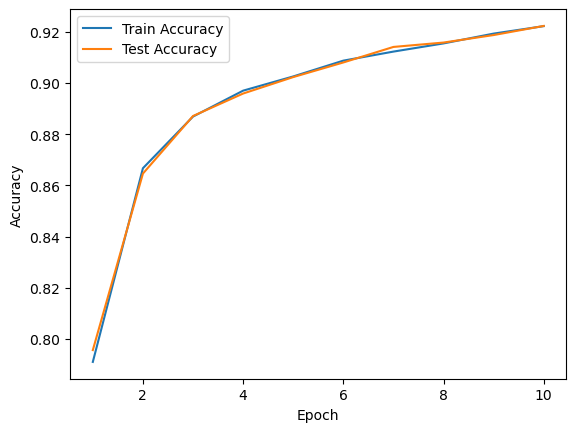

In [11]:
# Plot the accuracy vs. epoch
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
# Print the F1-Score
test_f1_score = f1_score(y_test, y_test_pred, average='macro')
print("\nTest F1-Score:", test_f1_score)


Test F1-Score: 0.9214446223802867


<a id='9'></a>
## Make predictions on the test set

In [14]:
# Make predictions on the test set
predictions = np.argmax(y_pred, axis=1)
print("\nSample Predictions:")
for i in range(10):
    print("Predicted:", predictions[i], "Actual:", y_test[i])


Sample Predictions:
Predicted: 8 Actual: 8
Predicted: 4 Actual: 4
Predicted: 5 Actual: 8
Predicted: 7 Actual: 7
Predicted: 7 Actual: 7
Predicted: 0 Actual: 0
Predicted: 6 Actual: 6
Predicted: 2 Actual: 2
Predicted: 7 Actual: 7
Predicted: 4 Actual: 4
